In [1]:
import matplotlib as plt
plt.rcParams["figure.autolayout"] = True # to for tight_layout()
import pymc as pm
import pytensor as pt
import numpy as np

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


# Uniform prior

In [2]:
with pm.Model() as model:
    x  = pm.DiscreteUniform('x', 0, 3, shape=2)
    x2 = pm.Deterministic('x2', x[0] + x[1])
    trace = pm.sample(draws=10_000, chains=4)

Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [x]


/home/pardo/programs/miniconda3/envs/sat_metropolis/lib/python3.12/site-packages/rich/live.py:231: UserWarning: 
install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 2 seconds.


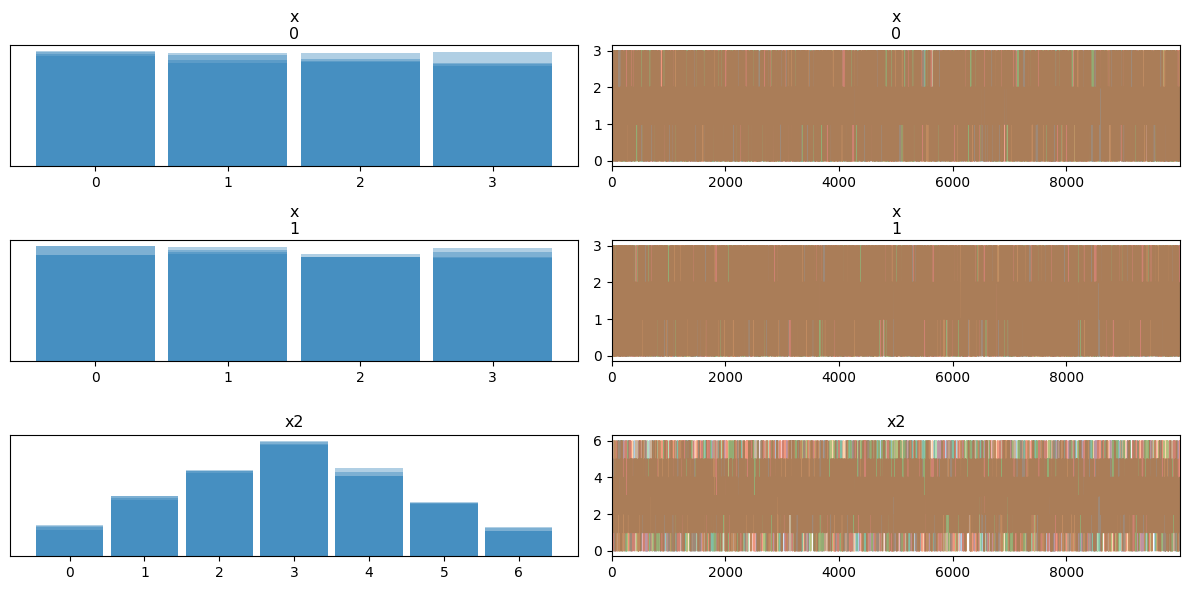

In [3]:
pm.plot_trace(trace, compact=False);

#  Non-uniform prior

In [4]:
with pm.Model() as model:
    x0  = pm.DiscreteUniform('x', 0, 3, shape=2)
    x1 = pm.Categorical('x1', p=[1/3,1/3,1/6,1/6])
    x2 = pm.Deterministic('x2', x0 + x1)
    trace1 = pm.sample(draws=10_000, chains=4)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [x]
>CategoricalGibbsMetropolis: [x1]


/home/pardo/programs/miniconda3/envs/sat_metropolis/lib/python3.12/site-packages/rich/live.py:231: UserWarning: 
install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 5 seconds.


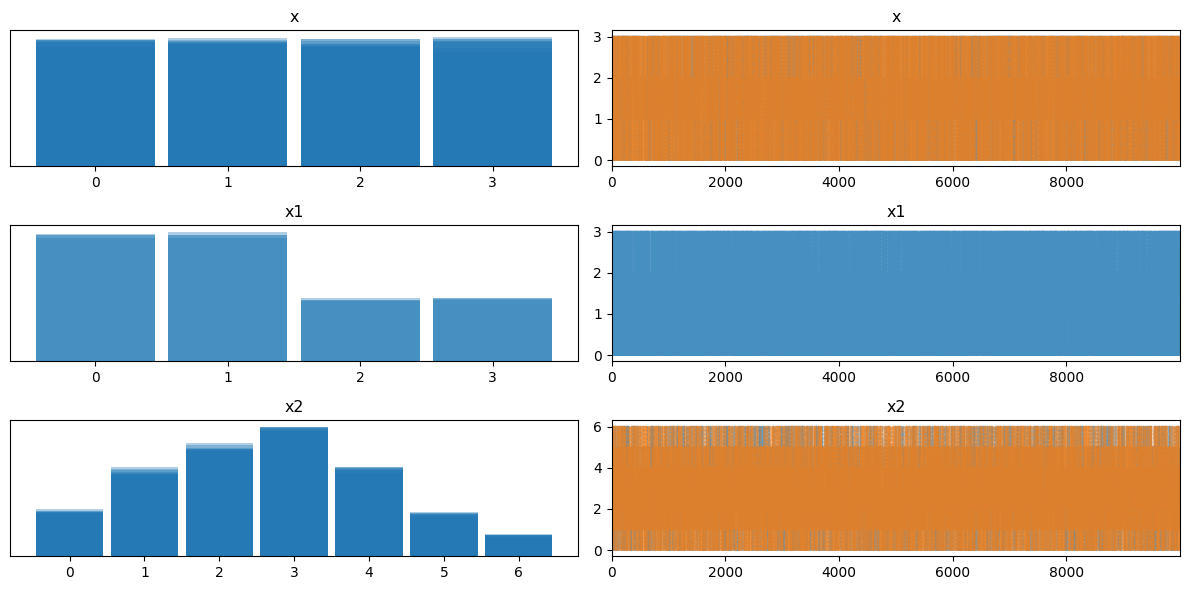

In [5]:
pm.plot_trace(trace1);